In [91]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer , LancasterStemmer , SnowballStemmer , WordNetLemmatizer
import nltk
nltk.download('wordnet')
import sklearn
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer,LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Machine_Learning_Assignments\training.1600000.processed.noemoticon.csv",encoding="Latin 1",header=None)

In [106]:
data1=data.copy()

In [107]:
data1.head()


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [108]:
data1.rename(columns={0:"Sentiment",1:"Id's",2:"Date",3:"Flag",4:"User",5:"Text"},inplace=True)

In [109]:
data1

,Sentiment,Id's,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [110]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id's       1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [111]:
data1["Sentiment"]=data1["Sentiment"].astype(object)

In [112]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  object
 1   Id's       1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Text       1600000 non-null  object
dtypes: int64(1), object(5)
memory usage: 73.2+ MB


In [113]:
#Finding unique values  in "Sentiment"
data1["Sentiment"].unique()

array([0, 4], dtype=object)

In [114]:
data1["Sentiment"]=data1["Sentiment"].map({0:"Negative",4:"Positive"})

In [115]:
#Dropped unwanted columns
data1=data1.drop(columns=["Id's","Date","Flag","User"],axis=1)

In [117]:
fv

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: Text, Length: 1600000, dtype: object

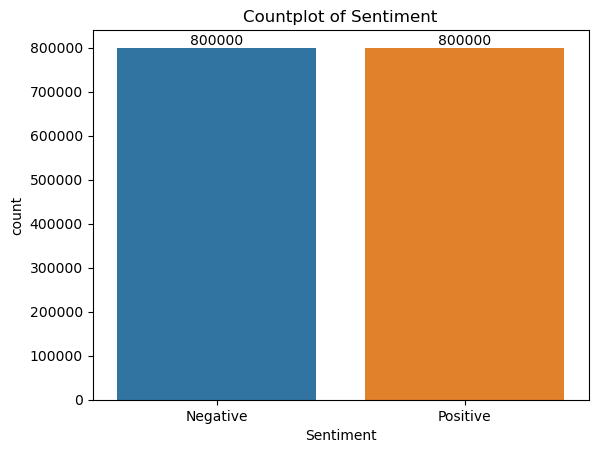

In [118]:
a=sns.countplot(data=data1,x="Sentiment")
for i in a.containers:
    a.bar_label(i)
plt.title("Countplot of Sentiment")
plt.show()

The given dataset is balanced dataset 
Dataset contains 800000 "Positive" and 800000 "Negative" tweets
(0-Nagative) and (4-Positive)

In [116]:
#Extracting feature variables and class variables
fv=data1.iloc[:,-1] #Feature variable
cv=data1.iloc[:,0]  #Class variable


In [142]:
#Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,stratify=cv,random_state=1)

In [122]:
#EDA

In [123]:
data1.describe()

,Sentiment,Text
count,1600000,1600000
unique,2,1581466
top,Negative,isPlayer Has Died! Sorry
freq,800000,210


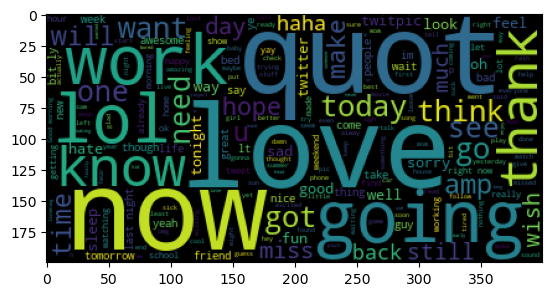

In [124]:
#Wordcloud 
from wordcloud import WordCloud
text=" ".join(i for i in data1["Text"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [125]:
data2=pd.concat([x_train,y_train],axis=1)

In [126]:
#Grouping the data by Sentiment
grp=data2.groupby("Sentiment")

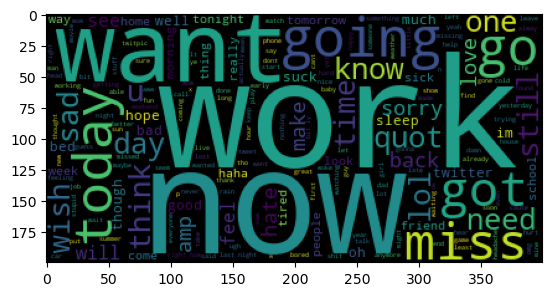

In [127]:
text=" ".join(i for i in grp.get_group("Negative")["Text"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

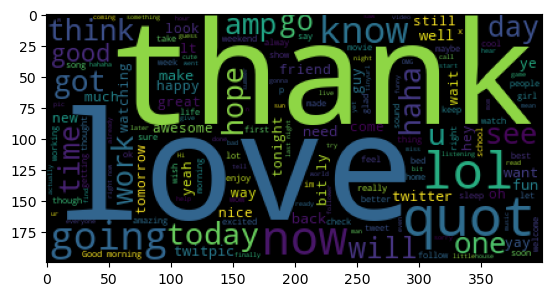

In [128]:
text=" ".join(i for i in grp.get_group("Positive")["Text"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.show()

In [131]:
#No of words in each text 
data2["Word_count"]=data2["Text"].apply(lambda x:len(x.split()))

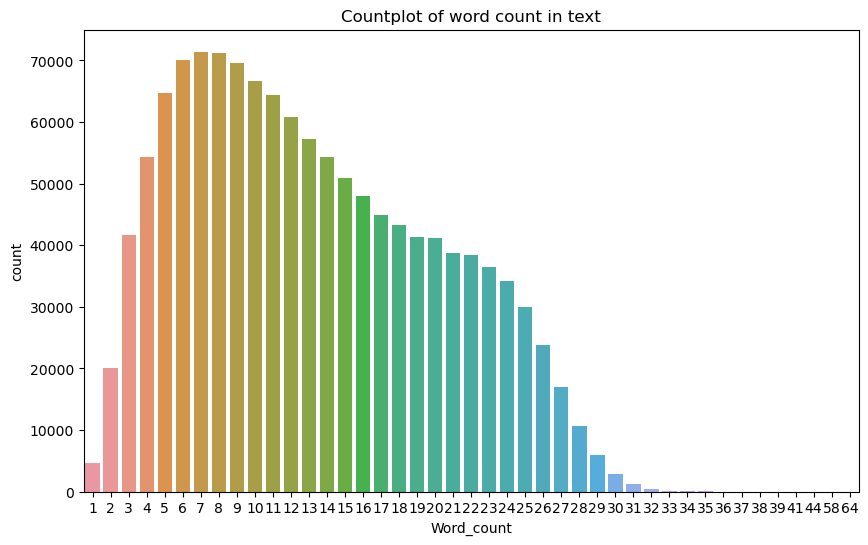

In [146]:
#plot of number of words in each text
plt.figure(figsize=(10,6))
sns.countplot(data=data2,x="Word_count")
plt.title("Countplot of word count in text")
plt.show()

In [ ]:
#Defining different functions to perform text preprocessing 

In [56]:
def lowers(x):
    return x.str.lower()

In [57]:
def html(x):
    return x.apply(lambda x : re.sub("<.+?>"," ",x))

In [58]:
def url(x):
    return x.apply(lambda x:re.sub("http[s]?://.+? +"," ",x))

In [67]:
def unw(x):
    return x.apply(lambda x:re.sub("[]:()*\-.,@#!'?/$%^&0-9]"," ",x))

In [68]:
stp=stopwords.words("english")
stp.remove("not")

In [69]:
def stp1(x):
   l=[]
   for word in word_tokenize(x):

          if word in stp:
             pass
          elif len(word)<=2:
             pass
          else:
            l.append(word)
   return " ".join(l)

In [70]:
def stpp(x):
    return x.apply(lambda x : stp1(x))

In [71]:
#Pipeline to perform Text preprocessing

In [72]:
pre_pro_ppline=Pipeline([("lower",FunctionTransformer(lowers)),("html",FunctionTransformer(html)),("url",FunctionTransformer(url)),("unw",FunctionTransformer(unw)),("stp",FunctionTransformer(stpp))])

In [73]:
pre_pro_ppline

Pipeline(steps=[('lower',
                 FunctionTransformer(func=<function lowers at 0x00000238904FFD00>)),
                ('html',
                 FunctionTransformer(func=<function html at 0x00000239A72C09D0>)),
                ('url',
                 FunctionTransformer(func=<function url at 0x00000239A72C0940>)),
                ('unw',
                 FunctionTransformer(func=<function unw at 0x000002393135D7E0>)),
                ('stp',
                 FunctionTransformer(func=<function stpp at 0x00000238BEBBF910>))])

In [74]:
pre_pro_ppline.fit_transform(x_train)

558487                ebeth strange reason please challenge
69791     missing watertown wan back hommmme loving visi...
797411    capplegate sounds like name earl really dont g...
782466                    decided twitter worse commercials
754556                                             try talk
                                ...                        
38767           aktrez yeah know feel sometimes wish switch
407996    simriel sorry laptop panic attack goatzilla na...
207376                                          thighs need
552293                                        college usual
955434                                     aclaysuper thank
Name: Text, Length: 1280000, dtype: object

In [75]:
final_ppline=Pipeline([("Pre_process",pre_pro_ppline),("Count_vector",CountVectorizer())])

In [76]:
import pickle

In [24]:
#Fiiting the final model

In [83]:
mb=MultinomialNB()

In [84]:
model=mb.fit(final_ppline.fit_transform(x_train),y_train)

In [ ]:
#Dumping the models

In [23]:
pickle.dump(final_ppline,open(r"C:\Users\LENOVO\Downloads\twitter.pkl","wb"))

In [27]:
pickle.dump(model,open(r"C:\Users\LENOVO\Downloads\twmodel1.pkl","wb"))

In [96]:
p="'i feel like a tortured artist when i talk to her'i"


In [100]:
#fx_train=final_ppline.fit_transform(x_train)
fx_test=final_ppline.transform(x_test)

In [140]:

y_le = LabelEncoder()
#y_train = y_le.fit_transform(y_train)
#y_test1 = y_le.transform(y_test)

In [143]:
#model=mb.fit(final_ppline.fit_transform(x_train),y_train)
predict=model.predict(fx_test)
accuracy_score(y_test,predict)

0.498896875

In [144]:
predict

array(['Negative', 'Positive', 'Negative', ..., 'Negative', 'Negative',
       'Negative'], dtype='<U8')

In [145]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

    Negative       0.50      0.53      0.51    160000
    Positive       0.50      0.47      0.49    160000

    accuracy                           0.50    320000
   macro avg       0.50      0.50      0.50    320000
weighted avg       0.50      0.50      0.50    320000

